In [ ]:
# %% Imports
import os
import json
import math
import pathlib
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    StratifiedKFold
)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score,
    classification_report,
    confusion_matrix,
    RocCurveDisplay,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    auc
)

from lightgbm import LGBMClassifier

# Suppress warnings
warnings.filterwarnings("ignore")

In [47]:
# Ruta relativa al proyecto
path = os.path.join("..", "data", "raw", "Mental Health Dataset.csv")
df = pd.read_csv(path)

print(f" Dataset cargado desde: {os.path.abspath(path)}")
print("Shape:", df.shape)
df.head()

 Dataset cargado desde: c:\Users\wladi\Desktop\Data Science\Portafolio\salud_mental\data\raw\Mental Health Dataset.csv
Shape: (292364, 17)


,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [49]:
df.describe(include='all').T.head(20)

,count,unique,top,freq
Timestamp,292364,580,8/27/2014 11:43,2384
Gender,292364,2,Male,239850
Country,292364,35,United States,171308
Occupation,292364,5,Housewife,66351
self_employed,287162,2,No,257994
family_history,292364,2,No,176832
treatment,292364,2,Yes,147606
Days_Indoors,292364,5,1-14 days,63548
Growing_Stress,292364,3,Maybe,99985
Changes_Habits,292364,3,Yes,109523


In [50]:
df.isna().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

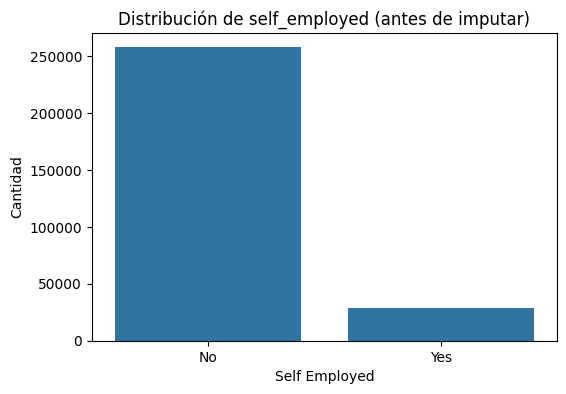

self_employed
No     89.842667
Yes    10.157333
Name: proportion, dtype: float64

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='self_employed')
plt.title("Distribución de self_employed (antes de imputar)")
plt.ylabel("Cantidad")
plt.xlabel("Self Employed")
plt.show()

# También ve porcentajes
df['self_employed'].value_counts(normalize=True) * 100


In [52]:
mode_value = df['self_employed'].mode()[0]
df['self_employed'] = df['self_employed'].fillna(mode_value)

In [53]:
mode_value = df['self_employed'].mode()[0]
df['self_employed'] = df['self_employed'].fillna(mode_value)

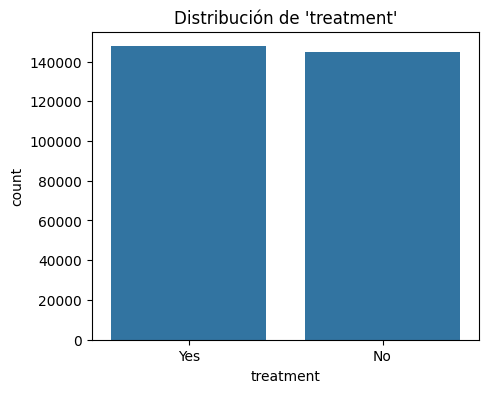

In [54]:
df['treatment'].value_counts()
df['treatment'].value_counts(normalize=True) * 100

plt.figure(figsize=(5,4))
sns.countplot(data=df, x='treatment')
plt.title("Distribución de 'treatment'")
plt.show()

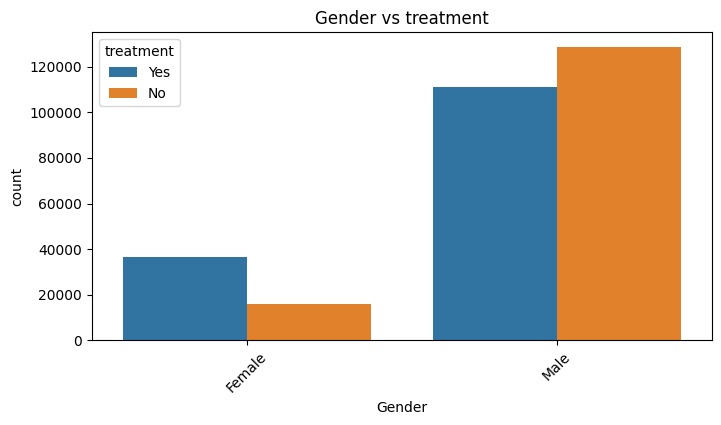

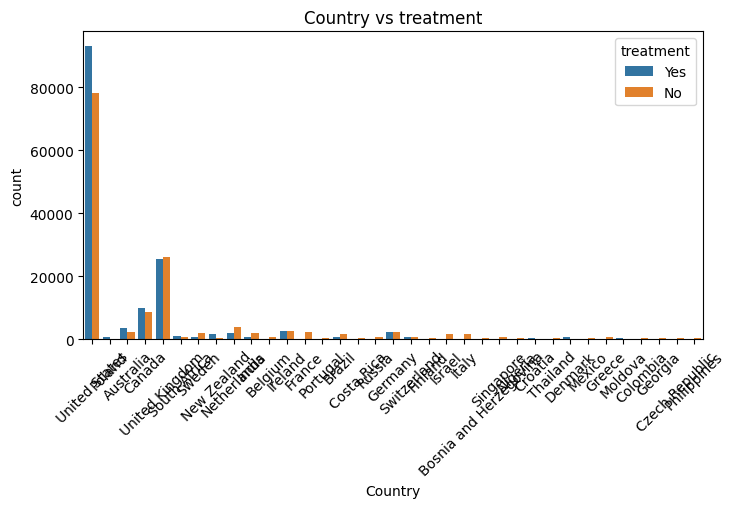

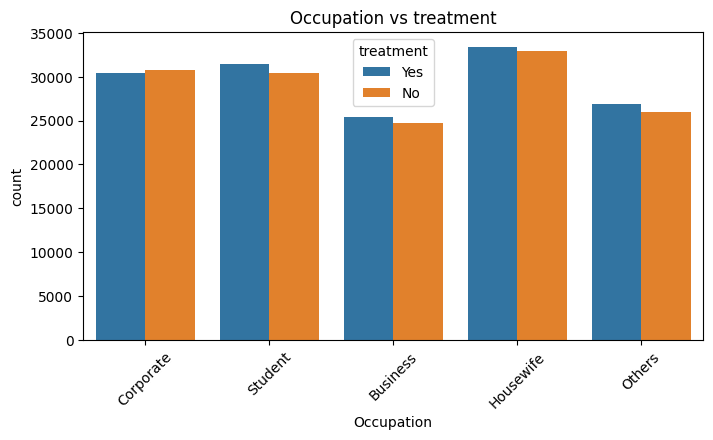

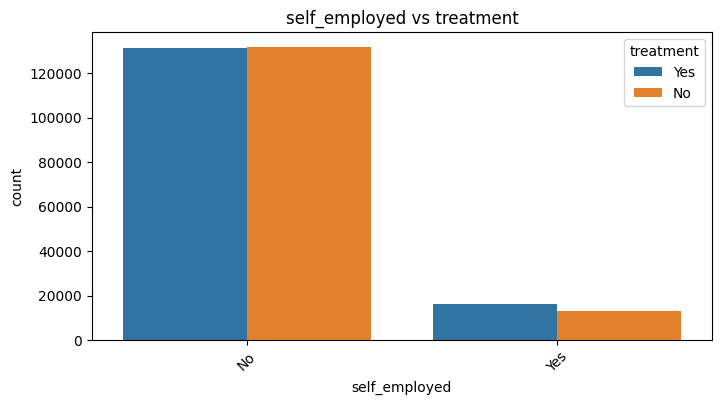

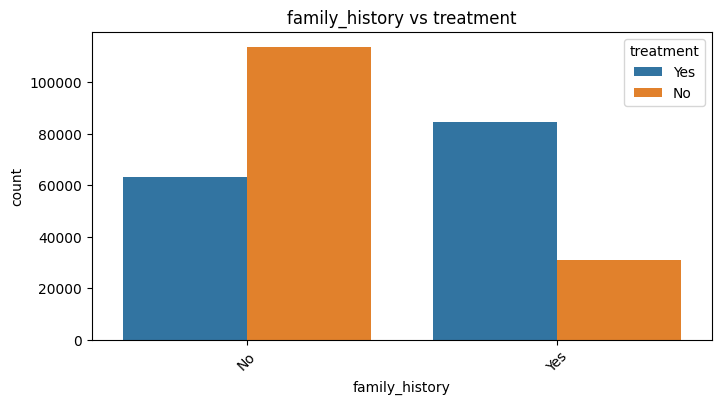

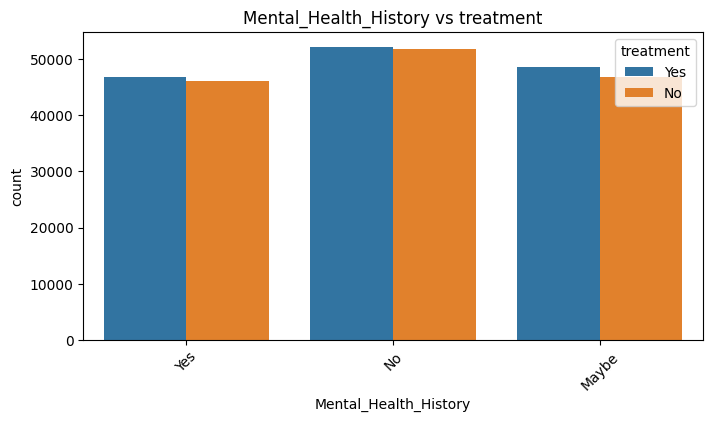

In [ ]:
personales = [
    'Gender', 'Occupation',
    'self_employed', 'family_history', 'Mental_Health_History'
]

for col in personales:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='treatment')
    plt.title(f"{col} vs treatment")
    plt.xticks(rotation=45)
    plt.show()


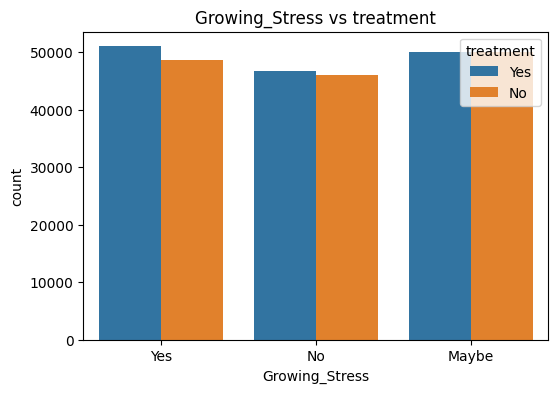

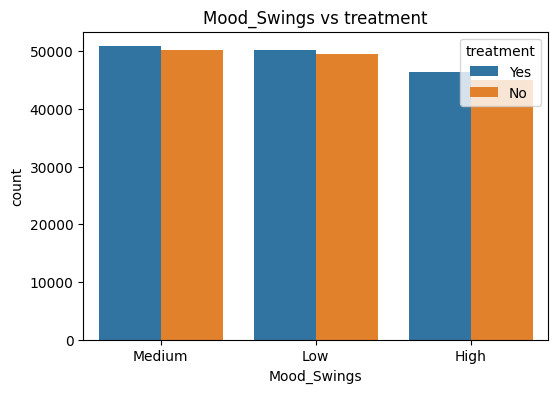

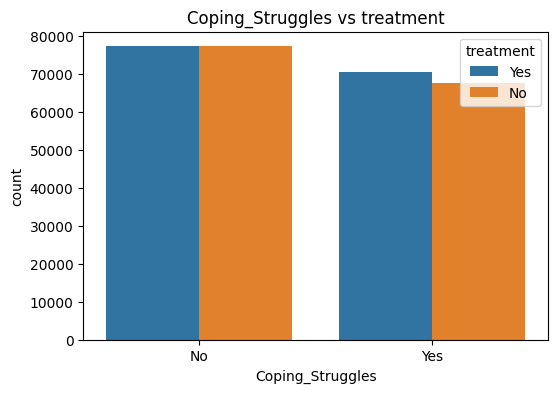

In [56]:
emocionales = ['Growing_Stress', 'Mood_Swings', 'Coping_Struggles']

for col in emocionales:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='treatment')
    plt.title(f"{col} vs treatment")
    plt.show()


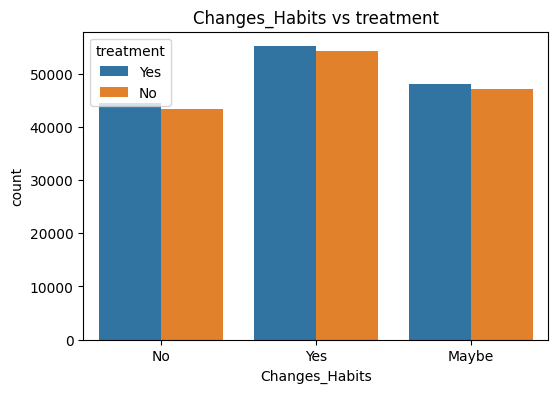

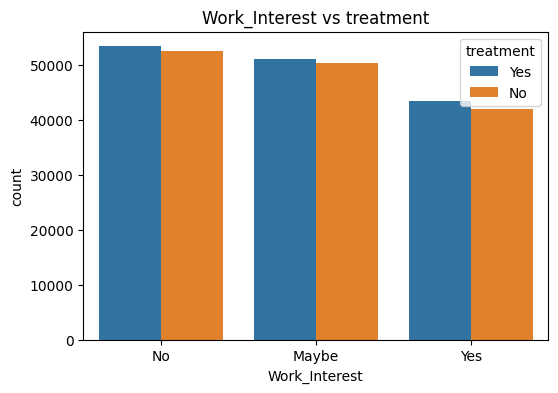

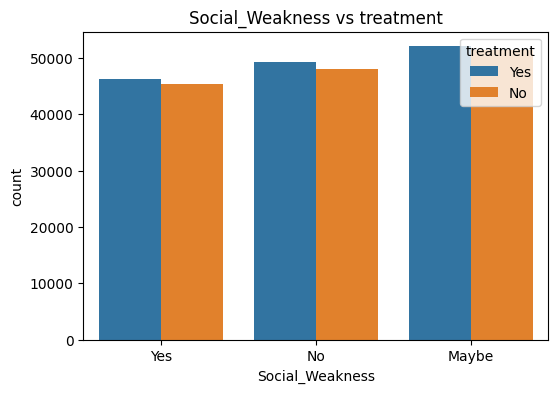

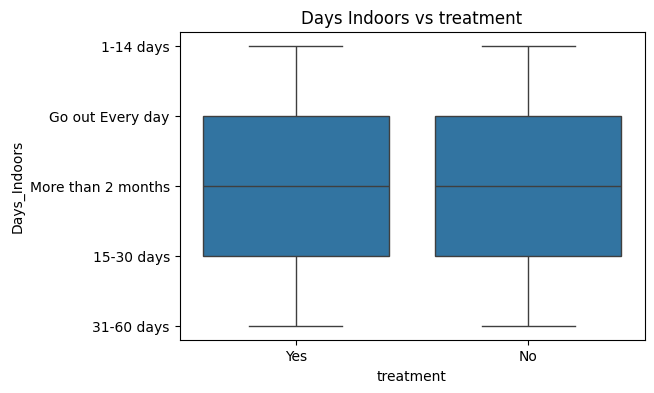

In [57]:
conductuales = ['Changes_Habits', 'Work_Interest', 'Social_Weakness']

for col in conductuales:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='treatment')
    plt.title(f"{col} vs treatment")
    plt.show()

# Days_Indoors es numérica → boxplot
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='treatment', y='Days_Indoors')
plt.title("Days Indoors vs treatment")
plt.show()


In [58]:
df = df.drop(columns=['Timestamp'])


In [59]:
import numpy as np
import pandas as pd
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


In [60]:
categoricas = df.select_dtypes(include=['object']).columns.tolist()

matriz = pd.DataFrame(index=categoricas, columns=categoricas)

for col1 in categoricas:
    for col2 in categoricas:
        matriz.loc[col1, col2] = cramers_v(df[col1], df[col2])

matriz = matriz.astype(float)


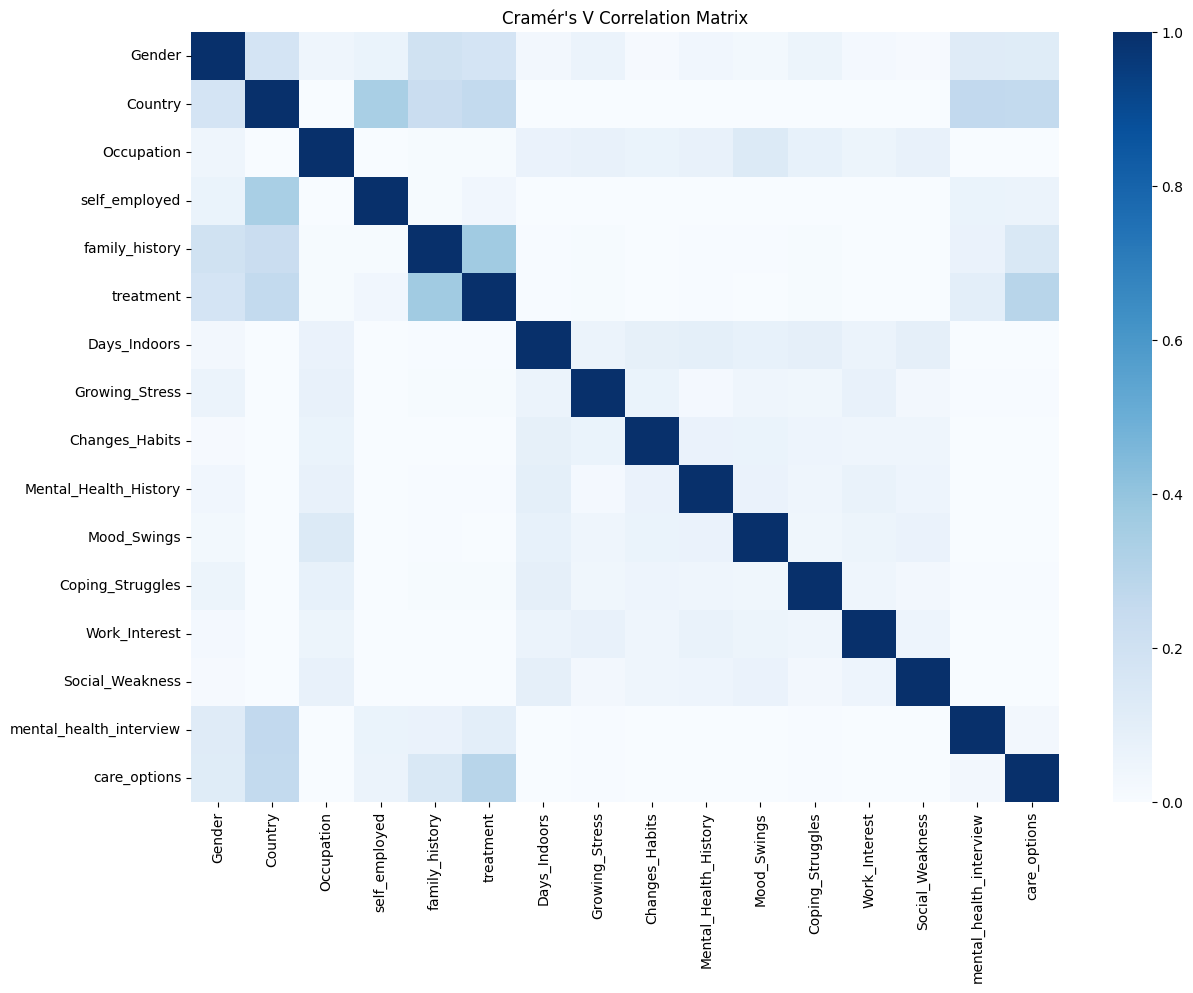

In [61]:
plt.figure(figsize=(14,10))
sns.heatmap(matriz, cmap="Blues", annot=False)
plt.title("Cramér's V Correlation Matrix")
plt.show()


In [62]:
for col in df.columns:
    print(col, df[col].unique()[:20])
    print()


Gender ['Female' 'Male']

Country ['United States' 'Poland' 'Australia' 'Canada' 'United Kingdom'
 'South Africa' 'Sweden' 'New Zealand' 'Netherlands' 'India' 'Belgium'
 'Ireland' 'France' 'Portugal' 'Brazil' 'Costa Rica' 'Russia' 'Germany'
 'Switzerland' 'Finland']

Occupation ['Corporate' 'Student' 'Business' 'Housewife' 'Others']

self_employed ['No' 'Yes']

family_history ['No' 'Yes']

treatment ['Yes' 'No']

Days_Indoors ['1-14 days' 'Go out Every day' 'More than 2 months' '15-30 days'
 '31-60 days']

Growing_Stress ['Yes' 'No' 'Maybe']

Changes_Habits ['No' 'Yes' 'Maybe']

Mental_Health_History ['Yes' 'No' 'Maybe']

Mood_Swings ['Medium' 'Low' 'High']

Coping_Struggles ['No' 'Yes']

Work_Interest ['No' 'Maybe' 'Yes']

Social_Weakness ['Yes' 'No' 'Maybe']

mental_health_interview ['No' 'Maybe' 'Yes']

care_options ['Not sure' 'No' 'Yes']



In [63]:
df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)


In [64]:
mood_map = {
    'low': 0,
    'medium': 1,
    'high': 2
}

df['Mood_Swings'] = df['Mood_Swings'].map(mood_map)


In [65]:
days_map = {
    'go out every day': 0,
    '1-14 days': 1,
    '15-30 days': 2,
    '31-60 days': 3,
    'more than 2 months': 4
}

df['Days_Indoors'] = df['Days_Indoors'].map(days_map)
